# Librerías

In [83]:
!pip install adversarial-robustness-toolbox

In [84]:

import tensorflow as tf
import numpy as np
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import TensorFlowV2Classifier
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [85]:
import matplotlib.pyplot as plt

# Cargar datos

In [86]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
dataset = pd.read_csv('/content/drive/MyDrive/tmp/out-7Marzv3.csv')
# print(dataset)

In [88]:
from sklearn.model_selection import train_test_split
def CargarYprepararDatos(data):
    #data['Pre_static_analysis.Filename'] = data['Pre_static_analysis.Filename'].str.split('.').str[0]
    test = data.apply(pd.to_numeric, errors='coerce')
    data = test
    X = data.drop("malware", axis=1)
    y = data["malware"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)
    return X_train, X_test, y_train, y_test


In [89]:
X_train, X_test, y_train, y_test = CargarYprepararDatos(dataset)

In [90]:
X_train

,Static_analysis.Opcodes.const-class,Static_analysis.Opcodes.move-object,Static_analysis.Opcodes.sparse-switch-payload,Static_analysis.Opcodes.return-void,Static_analysis.Opcodes.if-eqz,Static_analysis.Opcodes.invoke-static,Static_analysis.Opcodes.goto/16,Static_analysis.Opcodes.const/4,Static_analysis.Opcodes.sparse-switch,Static_analysis.Opcodes.move-exception,...,Static_analysis.Receivers.com.software.android.install.SmsReceiver,Static_analysis.Receivers.com.google.android.c2dm.C2DMBroadcastReceiver,Dynamic_analysis.Droidbox.recvsaction.com.google.android.c2dm.C2DMBroadcastReceiver,Dynamic_analysis.Droidbox.recvsaction..Notificator,Dynamic_analysis.Droidbox.recvsaction..SmsReceiver,Dynamic_analysis.Droidbox.recvsaction..Checker,com.software.android.install.permission.C2D_MESSAGE,com.google.android.c2dm.permission.RECEIVE,Dynamic_analysis.Droidbox.fdaccess,Dynamic_analysis.Droidbox.dexclass
379,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
575,0,0,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
527,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
713,1,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
354,1,0,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
424,0,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
685,0,0,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Características más comunes en aplicaciones malware:
Static_analysis.Opcodes.return                          0.936275
Static_analysis.Opcodes.rem-int/2addr                   0.921569
Static_analysis.Opcodes.move                            0.916667
android.permission.INTERNET                             0.916667
Static_analysis.Opcodes.and-int/lit8                    0.916667
android.permission.READ_CONTACTS                        0.916667
Static_analysis.Opcodes.and-int                         0.906863
Static_analysis.Opcodes.invoke-direct/range             0.901961
Static_analysis.Opcodes.filled-new-array                0.901961
android.permission.READ_PHONE_STATE                     0.901961
Static_analysis.Opcodes.div-long/2addr                  0.901961
Static_analysis.API calls.android.app.ProgressDialog    0.897059
Static_analysis.Opcodes.sub-long/2addr                  0.897059
Static_analysis.Opcodes.iput                            0.897059
Static_analysis.Opcodes.int-to-long  

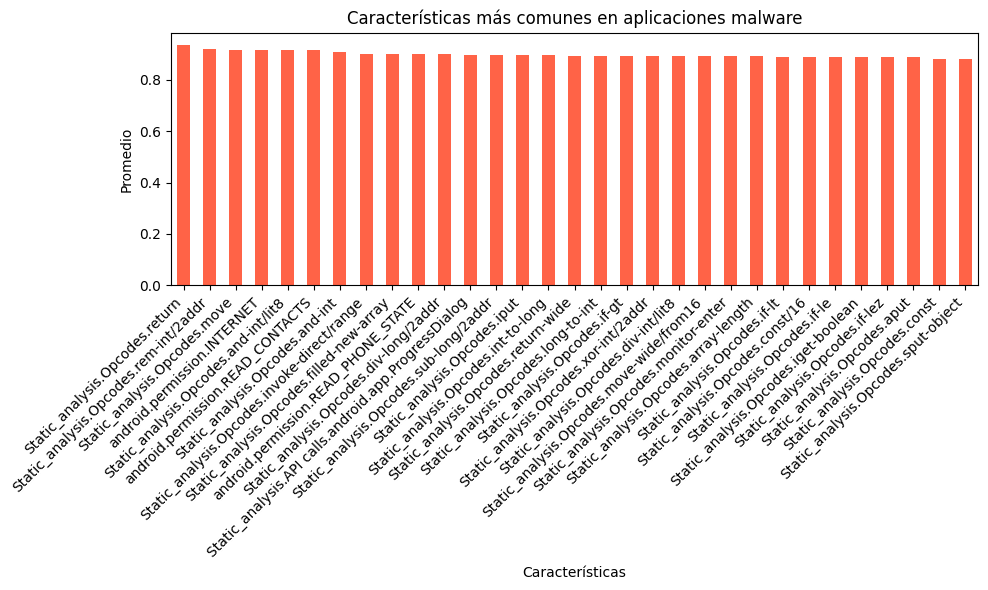

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

def analizar_caracteristicas_malware(X, y):
    # Filtrar datos de malware (y == 1)
    malware_data = X[y == 1]

    # Calcular el promedio de cada característica para las aplicaciones malware
    malware_means = malware_data.mean()

    # Seleccionar las características más representativas (por ejemplo, las 10 mayores)
    top_features = malware_means.sort_values(ascending=False).head(31)

    # Mostrar las características co12260munes
    print("Características más comunes en aplicaciones malware:")
    print(top_features)

    # Graficar las características
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='bar', color='tomato')
    plt.title("Características más comunes en aplicaciones malware")
    plt.xlabel("Características")
    plt.ylabel("Promedio")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Llamar a la función para analizar y graficar
analizar_caracteristicas_malware(X_train, y_train)


In [92]:
import numpy as np

# Verificar el balance de clases en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
train_distribution = dict(zip(unique, counts))
print("Distribución de clases en y_train:", train_distribution)

# Verificar el balance de clases en el conjunto de prueba
unique, counts = np.unique(y_test, return_counts=True)
test_distribution = dict(zip(unique, counts))
print("Distribución de clases en y_test:", test_distribution)

# Porcentaje de cada clase en y_train
total_train = len(y_train)
for label, count in train_distribution.items():
    print(f"Clase {label}: {count} ejemplos ({(count / total_train) * 100:.2f}%)")

# Porcentaje de cada clase en y_test
total_test = len(y_test)
for label, count in test_distribution.items():
    print(f"Clase {label}: {count} ejemplos ({(count / total_test) * 100:.2f}%)")


Distribución de clases en y_train: {np.int64(0): np.int64(444), np.int64(1): np.int64(204)}
Distribución de clases en y_test: {np.int64(0): np.int64(184), np.int64(1): np.int64(95)}
Clase 0: 444 ejemplos (68.52%)
Clase 1: 204 ejemplos (31.48%)
Clase 0: 184 ejemplos (65.95%)
Clase 1: 95 ejemplos (34.05%)


In [93]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)  # auto balancea la clase minoritaria

# Generar muestras sintéticas
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución de clases
unique, counts = np.unique(y_train_res, return_counts=True)
train_distribution_res = dict(zip(unique, counts))
print("Distribución de clases después de SMOTE:", train_distribution_res)

# Verificar la proporción de clases después de la re-muestreo
total_train_res = len(y_train_res)
for label, count in train_distribution_res.items():
    print(f"Clase {label}: {count} ejemplos ({(count / total_train_res) * 100:.2f}%)")


Distribución de clases después de SMOTE: {np.int64(0): np.int64(444), np.int64(1): np.int64(444)}
Clase 0: 444 ejemplos (50.00%)
Clase 1: 444 ejemplos (50.00%)


In [94]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)  # auto balancea la clase minoritaria

# Generar muestras sintéticas
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución de clases
unique, counts = np.unique(y_train_res, return_counts=True)
train_distribution_res = dict(zip(unique, counts))
print("Distribución de clases después de SMOTE:", train_distribution_res)

# Verificar la proporción de clases después de la re-muestreo
total_train_res = len(y_train_res)
for label, count in train_distribution_res.items():
    print(f"Clase {label}: {count} ejemplos ({(count / total_train_res) * 100:.2f}%)")


Distribución de clases después de SMOTE: {np.int64(0): np.int64(444), np.int64(1): np.int64(444)}
Clase 0: 444 ejemplos (50.00%)
Clase 1: 444 ejemplos (50.00%)


In [95]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)  # auto balancea la clase minoritaria

# Generar muestras sintéticas y obtener las nuevas variables
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución de clases después de SMOTE
unique, counts = np.unique(y_train_res, return_counts=True)
train_distribution_res = dict(zip(unique, counts))
print("Distribución de clases después de SMOTE:", train_distribution_res)

# Verificar la proporción de clases después de la re-muestreo
total_train_res = len(y_train_res)
for label, count in train_distribution_res.items():
    print(f"Clase {label}: {count} ejemplos ({(count / total_train_res) * 100:.2f}%)")

# Actualizar las variables X_train y y_train con los datos balanceados
X_train = X_train_res
y_train = y_train_res

# Ahora, X_train y y_train contienen las muestras balanceadas con SMOTE


Distribución de clases después de SMOTE: {np.int64(0): np.int64(444), np.int64(1): np.int64(444)}
Clase 0: 444 ejemplos (50.00%)
Clase 1: 444 ejemplos (50.00%)


# Convertir a numpy

In [96]:
#X_train
import pandas as pd
import numpy as np
np_X_train = X_train.to_numpy()
np_X_test = X_test.to_numpy()
np_y_train = y_train.to_numpy()
np_y_test = y_test.to_numpy()

In [97]:
# Prueba - To_categorical => https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical => Cambia la forma en la que entran los datos, se rompe en modelo
# X_train = to_categorical(X_train, 2)
# X_test = to_categorical(X_test, 2)
# y_train = to_categorical(y_train, 2)
# y_test = to_categorical(y_test, 2)
print(len(np_X_train))

888


In [98]:
print(type(np_y_test))
print(X_train.shape[1])

<class 'numpy.ndarray'>
12260


# Modelo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - acc: 0.7014 - loss: 0.6232
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - acc: 0.8921 - loss: 0.3371
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - acc: 0.8966 - loss: 0.2915
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - acc: 0.9076 - loss: 0.2340
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - acc: 0.9235 - loss: 0.1887
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - acc: 0.9343 - loss: 0.1395
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - acc: 0.9338 - loss: 0.1689
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - acc: 0.9444 - loss: 0.1558
Epoch 9/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - acc: 0.9504 - loss: 0.1469
Epoch 10/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.9565 - loss: 0.1212
Epoch 11/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - acc: 0.9535 - loss: 0.1884
Epoch 12/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - acc: 0.9371 - loss: 0.3197
Epoch 13/15
28/28 ━━━━━━━━━━━━━━

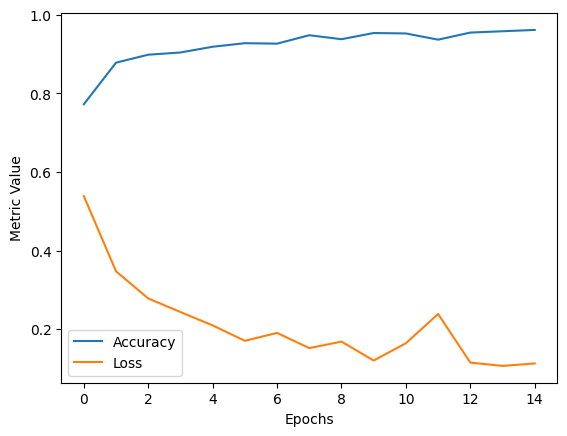

In [99]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Crear un modelo con más capas y Dropout
model = tf.keras.Sequential()

# Capa de entrada y capas ocultas con Dropout
model.add(tf.keras.layers.Dense(units=512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dropout(0.3))  # Dropout: apaga el 30% de las neuronas

model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))  # Dropout

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))  # Dropout

model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))  # Dropout

model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))  # Dropout

# Capa de salida
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compilar el modelo
opt = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

# Entrenar el modelo
hist = model.fit(np_X_train, np_y_train, verbose=True, epochs=15)

# Visualizar las métricas
plt.plot(hist.history['acc'], label='Accuracy')
plt.plot(hist.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.legend()
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


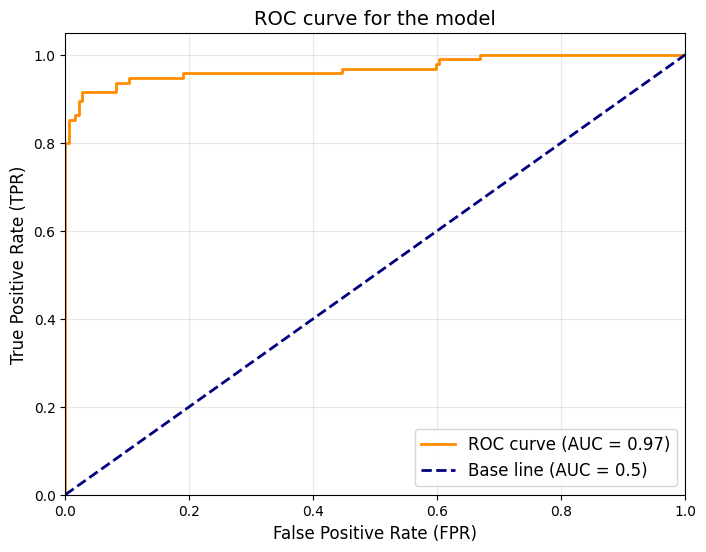

In [100]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob = model.predict(np_X_test)[:, 0]  # Asegúrate de que predicciones estén en la forma correcta

# Calcular FPR y TPR
fpr, tpr, thresholds = roc_curve(np_y_test, y_pred_prob)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Base line (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC curve for the model', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [101]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Predecir las etiquetas para los datos de prueba
y_pred_probs = model.predict(np_X_test)  # Obtiene las probabilidades de salida
y_pred = (y_pred_probs > 0.5).astype(int)  # Convierte probabilidades a etiquetas binarias (0 o 1)

# Asegurarse de que las etiquetas verdaderas estén en el formato adecuado
try:
    y_true = np.argmax(np_y_test, axis=1)  # Si es one-hot encoded
except:
    y_true = np_y_test  # Si ya es un array unidimensional

# Calcular métricas
precision = precision_score(y_true, y_pred, average="binary")
recall = recall_score(y_true, y_pred, average="binary")
f1 = f1_score(y_true, y_pred, average="binary")
accuracy = accuracy_score(y_true, y_pred)

# Imprimir resultados
print(f"Métricas en los datos de prueba:")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Exactitud (Accuracy): {accuracy:.2f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Métricas en los datos de prueba:
Precisión: 0.96
Recall: 0.86
F1-score: 0.91
Exactitud (Accuracy): 0.94


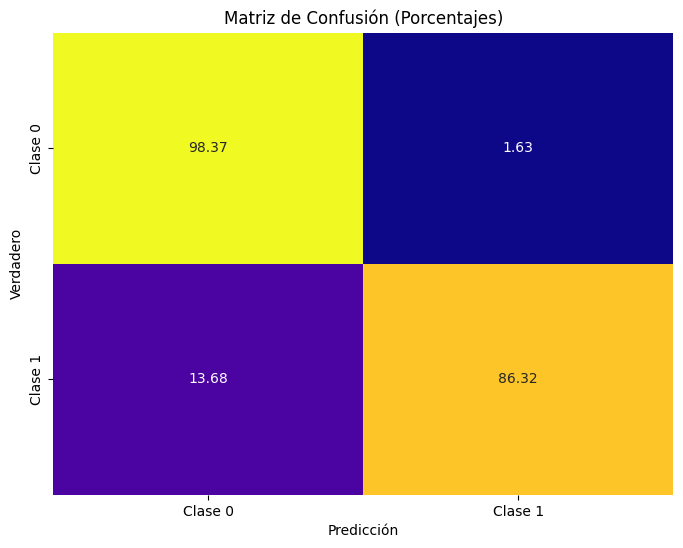

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Convertir los valores a porcentajes
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Crear una visualización con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="plasma", cbar=False,
            xticklabels=["Clase 0", "Clase 1"],
            yticklabels=["Clase 0", "Clase 1"])
plt.title("Matriz de Confusión (Porcentajes)")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()


# Ataque 1 = Generar muestras adversarias con FGSM

In [103]:
print(len(np_X_test))
print(len(np_X_test)/10)

279
27.9


In [104]:
# Crear un clasificador ART a partir del modelo de TensorFlow
classifier = TensorFlowV2Classifier(
    model=model,
    input_shape=len(np_X_test[0:35]),
    clip_values=(0, 1),
    nb_classes=2,
    loss_object=tf.keras.losses.CategoricalCrossentropy()
)

# Evaluar el modelo en los datos de prueba limpios
predictions = np.argmax(classifier.predict(np_X_test[0:35]), axis=1)

In [105]:
from tensorflow.keras.utils import to_categorical
accuracy = np.sum(predictions == np.argmax(np_X_test[0:35])) / len(np_X_test[0:35])
print(f"Precisión en datos de prueba: {accuracy * 100:.2f}%")

attack = FastGradientMethod(estimator=classifier, eps=0.3)
x_test_adv = attack.generate(x=np_X_test[0:35])


Precisión en datos de prueba: 0.00%


/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(3, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


In [106]:
x_test_adv

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]], dtype=float32)

In [107]:

# Evaluar el modelo en los datos adversarios
predictions_adv = np.argmax(classifier.predict(x_test_adv))
accuracy_adv = np.sum(predictions_adv == np.argmax(np_y_test[0:35])) / len(np_y_test[0:35])
print(f"Precisión en datos adversarios: {accuracy_adv * 100:.2f}%")

# Comparar predicciones antes y después del ataque
print("Predicciones en muestras limpias:", predictions)
print("Predicciones en muestras con FGSM:", predictions_adv)


Precisión en datos adversarios: 0.00%
Predicciones en muestras limpias: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicciones en muestras con FGSM: 6


In [108]:
print(len(x_test_adv))
print(accuracy_adv)

35
0.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - acc: 0.7348 - loss: 2.8470 


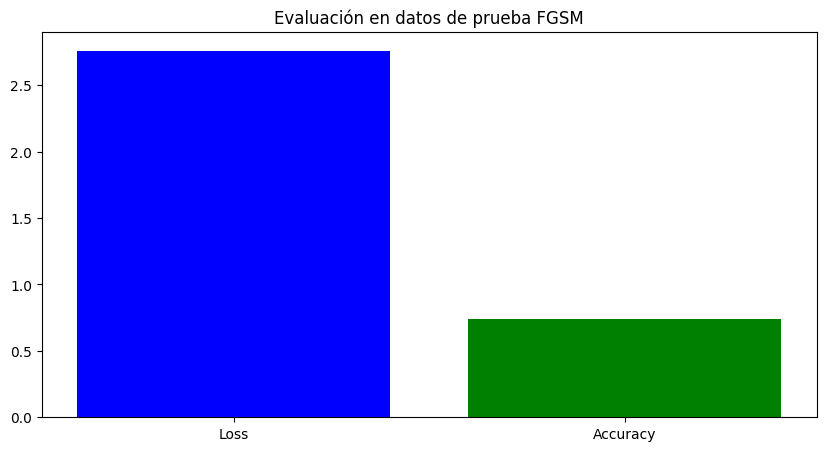

In [109]:
array_zeros = np.zeros(len(x_test_adv), dtype=int)


# Evaluar el modelo y graficar la pérdida y precisión
history_test = model.evaluate(x_test_adv, array_zeros, verbose=True)

# Graficar la pérdida y precisión
plt.figure(figsize=(10, 5))
plt.bar(["Loss", "Accuracy"], history_test, color=["blue", "green"])
plt.title("Evaluación en datos de prueba FGSM")
plt.show()

Métricas en datos adversarios (FGSM):
Precisión: 0.00
Recall: 0.00
F1-score: 0.00
Exactitud (Accuracy): 0.71

Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 0       0.71      1.00      0.83        25
     Clase 1       0.00      0.00      0.00        10

    accuracy                           0.71        35
   macro avg       0.36      0.50      0.42        35
weighted avg       0.51      0.71      0.60        35



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

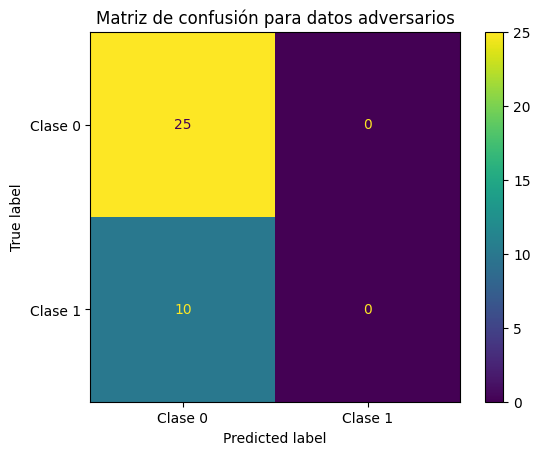

In [110]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Etiquetas verdaderas
try:
    y_true_adv = np.argmax(np_y_test[0:35], axis=1)  # Si es one-hot encoded
except:
    y_true_adv = np_y_test[0:35]  # Si ya es un array unidimensional

# Predicciones adversarias
predictions_adv = classifier.predict(x_test_adv)
y_pred_adv = np.argmax(predictions_adv, axis=1)  # Convertir a clases

# Calcular métricas
precision_adv = precision_score(y_true_adv, y_pred_adv, average="binary")
recall_adv = recall_score(y_true_adv, y_pred_adv, average="binary")
f1_adv = f1_score(y_true_adv, y_pred_adv, average="binary")
accuracy_adv = accuracy_score(y_true_adv, y_pred_adv)

# Mostrar resultados
print("Métricas en datos adversarios (FGSM):")
print(f"Precisión: {precision_adv:.2f}")
print(f"Recall: {recall_adv:.2f}")
print(f"F1-score: {f1_adv:.2f}")
print(f"Exactitud (Accuracy): {accuracy_adv:.2f}")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_true_adv, y_pred_adv, target_names=["Clase 0", "Clase 1"]))

# Visualizar matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true_adv, y_pred_adv, display_labels=["Clase 0", "Clase 1"])
plt.title("Matriz de confusión para datos adversarios")
plt.show()


# Ataque 2 - BasicIterativeMethod

In [111]:
# Crear un clasificador ART a partir del modelo de TensorFlow
classifier2 = TensorFlowV2Classifier(
    model=model,
    input_shape=len(np_X_test[35:70]),
    clip_values=(0, 1),
    nb_classes=2,
    loss_object=tf.keras.losses.CategoricalCrossentropy()
)

# Evaluar el modelo en los datos de prueba limpios
predictions2 = np.argmax(classifier2.predict(np_X_test[35:70]), axis=1)


In [112]:
from art.attacks.evasion import BasicIterativeMethod

In [113]:
accuracy2 = np.sum(predictions2 == np.argmax(np_y_test[35:70])) / len(np_y_test[35:70])
print(f"Precisión en datos de prueba: {accuracy2 * 100:.2f}%")

attack2 = BasicIterativeMethod(estimator=classifier2, eps=0.4, eps_step=0.05, max_iter=200)
x_test_adv2 = attack2.generate(x=np_X_test[35:70])


Precisión en datos de prueba: 0.00%


PGD - Batches: 0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(3, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


In [114]:
print(len(x_test_adv2))

35


In [115]:
df_x_test_adv2 = pd.DataFrame(x_test_adv2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - acc: 0.6673 - loss: 3.3202


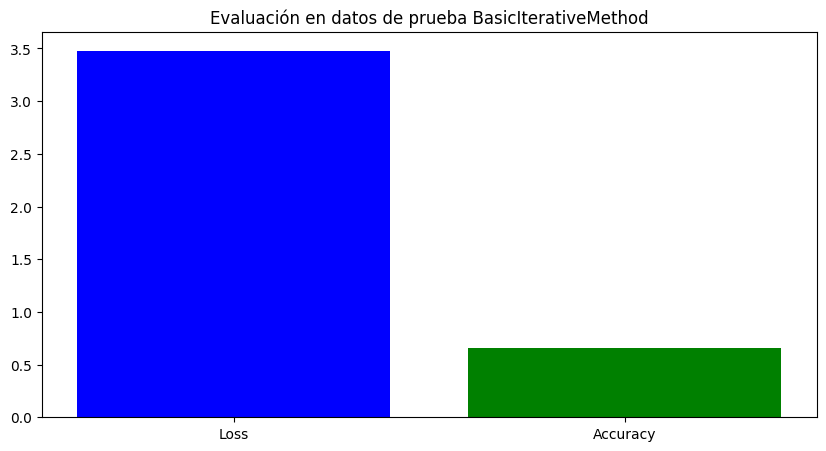

In [116]:
array_zeros = np.zeros(len(np_X_test[35:70]), dtype=int)

# Evaluar el modelo y graficar la pérdida y precisión
history_test2 = model.evaluate(x_test_adv2, array_zeros, verbose=True)

# Graficar la pérdida y precisión
plt.figure(figsize=(10, 5))
plt.bar(["Loss", "Accuracy"], history_test2, color=["blue", "green"])
plt.title("Evaluación en datos de prueba BasicIterativeMethod")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Métricas en datos adversarios (BIM):
Precisión: 0.00
Recall: 0.00
F1-score: 0.00
Exactitud (Accuracy): 0.63

Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 0       0.63      1.00      0.77        22
     Clase 1       0.00      0.00      0.00        13

    accuracy                           0.63        35
   macro avg       0.31      0.50      0.39        35
weighted avg       0.40      0.63      0.49        35



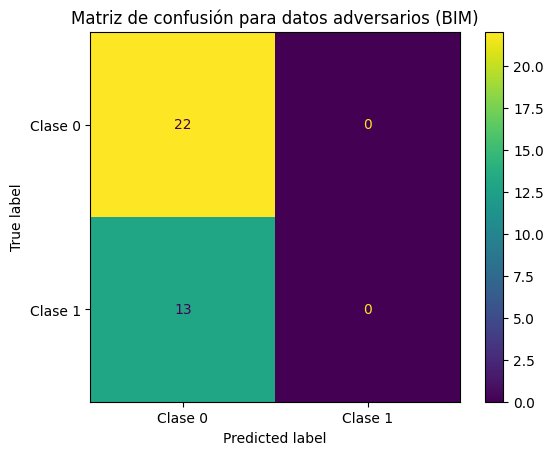

In [117]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Etiquetas verdaderas
try:
    y_true_adv2 = np.argmax(np_y_test[35:70], axis=1)  # Si es one-hot encoded
except:
    y_true_adv2 = np_y_test[35:70]  # Si ya es un array unidimensional

# Predicciones adversarias
predictions_adv2 = classifier2.predict(x_test_adv2)
y_pred_adv2 = np.argmax(predictions_adv2, axis=1)  # Convertir a clases

# Calcular métricas
precision_adv2 = precision_score(y_true_adv2, y_pred_adv2, average="binary")
recall_adv2 = recall_score(y_true_adv2, y_pred_adv2, average="binary")
f1_adv2 = f1_score(y_true_adv2, y_pred_adv2, average="binary")
accuracy_adv2 = accuracy_score(y_true_adv2, y_pred_adv2)

# Mostrar resultados
print("Métricas en datos adversarios (BIM):")
print(f"Precisión: {precision_adv2:.2f}")
print(f"Recall: {recall_adv2:.2f}")
print(f"F1-score: {f1_adv2:.2f}")
print(f"Exactitud (Accuracy): {accuracy_adv2:.2f}")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_true_adv2, y_pred_adv2, target_names=["Clase 0", "Clase 1"]))

# Visualizar matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true_adv2, y_pred_adv2, display_labels=["Clase 0", "Clase 1"])
plt.title("Matriz de confusión para datos adversarios (BIM)")
plt.show()


# Ataque 3 - ProjectedGradientDescent

In [118]:
from art.attacks.evasion import ProjectedGradientDescent

In [119]:
# Crear un clasificador ART a partir del modelo de TensorFlow
classifier3 = TensorFlowV2Classifier(
    model=model,
    input_shape=len(np_X_test[70:105]),
    clip_values=(0, 1),
    nb_classes=2,
    loss_object=tf.keras.losses.CategoricalCrossentropy()
)

# Evaluar el modelo en los datos de prueba limpios
predictions3 = np.argmax(classifier3.predict(np_X_test[70:105]), axis=1)


accuracy3 = np.sum(predictions3 == np.argmax(np_y_test[70:105])) / len(np_y_test[70:105])
print(f"Precisión en datos de prueba: {accuracy3 * 100:.2f}%")

attack3 = ProjectedGradientDescent(estimator=classifier3, eps=0.4, eps_step=0.01, max_iter=90, batch_size=16)
x_test_adv3 = attack3.generate(x=np_X_test[70:105])
df_x_test_adv3 = pd.DataFrame(x_test_adv3)


Precisión en datos de prueba: 0.00%


PGD - Batches: 0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(16, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(3, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - acc: 0.6673 - loss: 4.1090


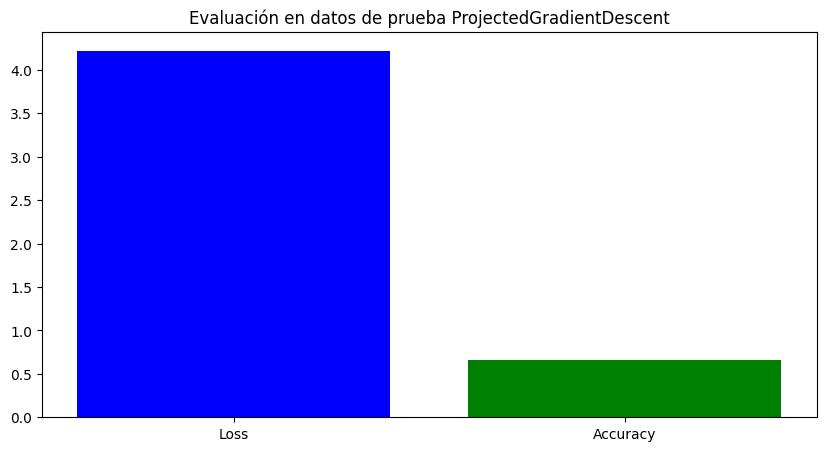

In [120]:
array_zeros = np.zeros(len(np_X_test[70:105]), dtype=int)

# Evaluar el modelo y graficar la pérdida y precisión
history_test3 = model.evaluate(x_test_adv3, array_zeros, verbose=True)

# Graficar la pérdida y precisión
plt.figure(figsize=(10, 5))
plt.bar(["Loss", "Accuracy"], history_test3, color=["blue", "green"])
plt.title("Evaluación en datos de prueba ProjectedGradientDescent")
plt.show()

Métricas en datos adversarios (PGD):
Precisión: 0.00
Recall: 0.00
F1-score: 0.00
Exactitud (Accuracy): 0.63

Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 0       0.63      1.00      0.77        22
     Clase 1       0.00      0.00      0.00        13

    accuracy                           0.63        35
   macro avg       0.31      0.50      0.39        35
weighted avg       0.40      0.63      0.49        35



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

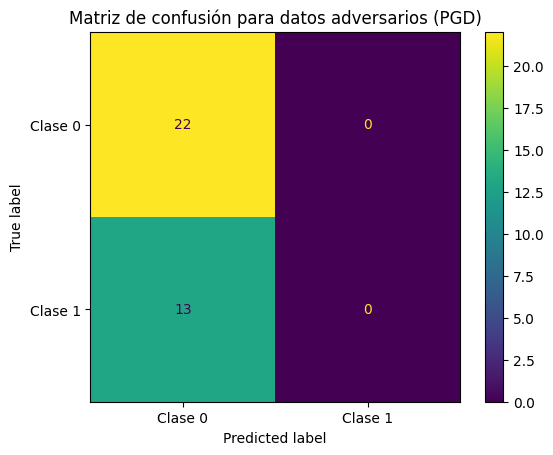

In [121]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Etiquetas verdaderas
try:
    y_true_adv3 = np.argmax(np_y_test[70:105], axis=1)  # Si es one-hot encoded
except:
    y_true_adv3 = np_y_test[70:105]  # Si ya es un array unidimensional

# Predicciones adversarias
predictions_adv3 = classifier3.predict(x_test_adv3)
y_pred_adv3 = np.argmax(predictions_adv3, axis=1)  # Convertir a clases

# Calcular métricas
precision_adv3 = precision_score(y_true_adv3, y_pred_adv3, average="binary")
recall_adv3 = recall_score(y_true_adv3, y_pred_adv3, average="binary")
f1_adv3 = f1_score(y_true_adv3, y_pred_adv3, average="binary")
accuracy_adv3 = accuracy_score(y_true_adv3, y_pred_adv3)

# Mostrar resultados
print("Métricas en datos adversarios (PGD):")
print(f"Precisión: {precision_adv3:.2f}")
print(f"Recall: {recall_adv3:.2f}")
print(f"F1-score: {f1_adv3:.2f}")
print(f"Exactitud (Accuracy): {accuracy_adv3:.2f}")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_true_adv3, y_pred_adv3, target_names=["Clase 0", "Clase 1"]))

# Visualizar matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true_adv3, y_pred_adv3, display_labels=["Clase 0", "Clase 1"])
plt.title("Matriz de confusión para datos adversarios (PGD)")
plt.show()


In [122]:
#from art.attacks.evasion import SaliencyMapMethod # Da un error: InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 1 of dimension 1 out of bounds. [Op:StridedSlice] name: strided_slice/

# Ataque 4 - ZOO - Error: Casting

In [123]:
from art.attacks.evasion import ZooAttack


In [124]:
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [125]:

# Validar la forma de los datos de entrada
print("Forma de np_x_test:", np_X_test.shape)

Forma de np_x_test: (279, 12260)


In [126]:
# Crear un clasificador ART a partir del modelo de TensorFlow
classifier5 = TensorFlowV2Classifier(
     model=model,  # Tu modelo TensorFlow/Keras
    input_shape=(12260,), #(134, 35),  # 10138 características por muestra
    clip_values=(0, 1),  # Rango de valores de entrada (por ejemplo, imágenes normalizadas)
    nb_classes=2,  # Número de clases en el modelo
    loss_object=tf.keras.losses.CategoricalCrossentropy()
)

# Configurar el ataque ZOO
attack5 = ZooAttack(
    classifier=classifier5,
    confidence=0.0,  # Confianza deseada en los ejemplos adversarios
    targeted=False,  # Es un ataque no dirigido (no seleccionamos una clase específica como objetivo)
    learning_rate=0.01,  # Tasa de aprendizaje
    max_iter=10,  # Número máximo de iteraciones
    binary_search_steps=5,  # Número de pasos para búsqueda binaria
    initial_const=0.01,  # Constante inicial de ataque
    abort_early=True  # Finaliza antes si no hay progreso
)

np_X_test_zoo= np_X_test.astype('float64')
# Generar ejemplos adversarios
x_test_adv5 = attack5.generate(x=np_X_test_zoo[99:134])


ZOO:   0%|          | 0/35 [00:00<?, ?it/s]

In [127]:

#np_X_test= np_X_test.astype('float64')

# # Evaluar el modelo en los datos de prueba limpios
# predictions5 = np.argmax(classifier5.predict(np_X_test), axis=1)


# accuracy5 = np.sum(predictions3 == np.argmax(np_y_test)) / len(np_y_test)
# print(f"Precisión en datos de prueba: {accuracy5 * 100:.2f}%")

# attack5 = ZooAttack(classifier=classifier5)
# x_test_adv5 = attack5.generate(x=np_X_test)
# df_x_test_adv5 = pd.DataFrame(x_test_adv5)


In [128]:
df_x_test_adv5 = pd.DataFrame(x_test_adv5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - acc: 0.5875 - loss: 5.3791


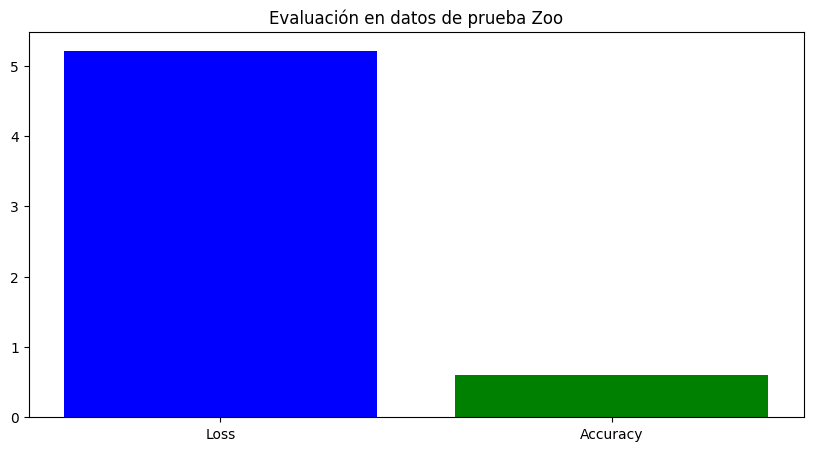

In [129]:


# Evaluar el modelo y graficar la pérdida y precisión
history_test5 = model.evaluate(x_test_adv5, array_zeros, verbose=True)

# Graficar la pérdida y precisión
plt.figure(figsize=(10, 5))
plt.bar(["Loss", "Accuracy"], history_test5, color=["blue", "green"])
plt.title("Evaluación en datos de prueba Zoo")
plt.show()

Métricas en datos adversarios (ZOO):
Precisión: 0.42
Recall: 1.00
F1-score: 0.60
Exactitud (Accuracy): 0.46

Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 0       1.00      0.10      0.17        21
     Clase 1       0.42      1.00      0.60        14

    accuracy                           0.46        35
   macro avg       0.71      0.55      0.38        35
weighted avg       0.77      0.46      0.34        35



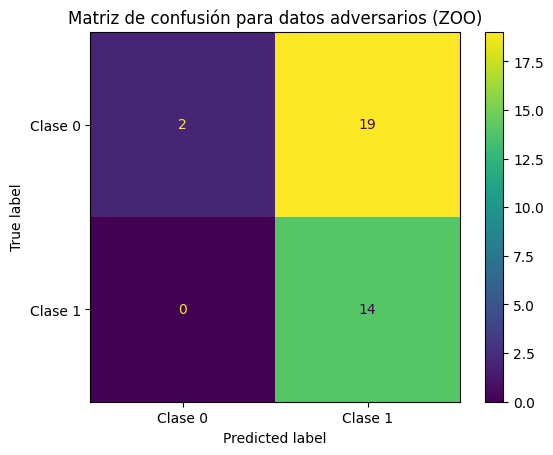

In [130]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Etiquetas verdaderas (asegurándonos de manejar one-hot encoding o etiquetas directas)
try:
    y_true_adv5 = np.argmax(np_y_test[99:134], axis=1)  # Si es one-hot encoded
except:
    y_true_adv5 = np_y_test[99:134]  # Si ya es un array unidimensional

# Predicciones adversarias
predictions_adv5 = classifier5.predict(x_test_adv5)
y_pred_adv5 = np.argmax(predictions_adv5, axis=1)  # Convertir a clases si es one-hot

# Calcular métricas
precision_adv5 = precision_score(y_true_adv5, y_pred_adv5, average="binary")
recall_adv5 = recall_score(y_true_adv5, y_pred_adv5, average="binary")
f1_adv5 = f1_score(y_true_adv5, y_pred_adv5, average="binary")
accuracy_adv5 = accuracy_score(y_true_adv5, y_pred_adv5)

# Mostrar resultados
print("Métricas en datos adversarios (ZOO):")
print(f"Precisión: {precision_adv5:.2f}")
print(f"Recall: {recall_adv5:.2f}")
print(f"F1-score: {f1_adv5:.2f}")
print(f"Exactitud (Accuracy): {accuracy_adv5:.2f}")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_true_adv5, y_pred_adv5, target_names=["Clase 0", "Clase 1"]))

# Visualizar matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_true_adv5, y_pred_adv5, display_labels=["Clase 0", "Clase 1"])
plt.title("Matriz de confusión para datos adversarios (ZOO)")
plt.show()


# Ataque 5 - DeepFool

In [131]:
from art.attacks.evasion import DeepFool
print(len(np_X_test))

279


In [132]:
# Crear un clasificador ART a partir del modelo de TensorFlow
classifier4 = TensorFlowV2Classifier(
    model=model,
    input_shape=len(np_X_test),
    clip_values=(0, 1),
    nb_classes=2,
    loss_object=tf.keras.losses.CategoricalCrossentropy()
)

# Evaluar el modelo en los datos de prueba limpios
predictions4 = np.argmax(classifier4.predict(np_X_test), axis=1)
accuracy4 = np.sum(predictions4 == np.argmax(np_y_test)) / len(np_y_test)
print(f"Precisión en datos de prueba: {accuracy4 * 100:.2f}%")


Precisión en datos de prueba: 0.00%


In [133]:
attack4 = DeepFool(classifier=classifier4, max_iter=1, epsilon=0.00005, nb_grads=2, batch_size=32, verbose=True)
x_test_adv4 = attack4.generate(x=np_X_test)
df_x_test_adv4 = pd.DataFrame(x_test_adv4)


DeepFool:   0%|          | 0/9 [00:00<?, ?it/s]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.8697 - loss: 1.9203


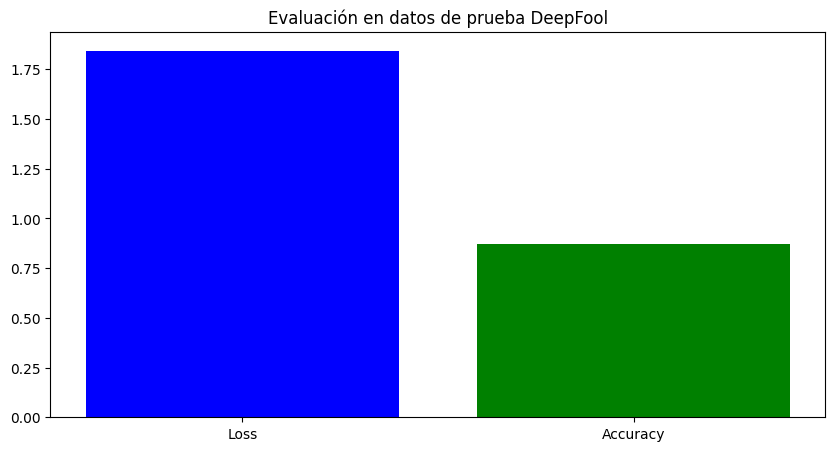

In [134]:
array_zeros = np.zeros(len(np_X_test), dtype=int)

# Evaluar el modelo y graficar la pérdida y precisión
history_test4 = model.evaluate(x_test_adv4, array_zeros, verbose=True)

# Graficar la pérdida y precisión
plt.figure(figsize=(10, 5))
plt.bar(["Loss", "Accuracy"], history_test4, color=["blue", "green"])
plt.title("Evaluación en datos de prueba DeepFool")
plt.show()

Métricas en datos adversarios (DeepFool):
Precisión: 0.28
Recall: 0.58
F1-score: 0.37
Exactitud (Accuracy): 0.34

Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 0       0.50      0.22      0.30       184
     Clase 1       0.28      0.58      0.37        95

    accuracy                           0.34       279
   macro avg       0.39      0.40      0.34       279
weighted avg       0.42      0.34      0.33       279



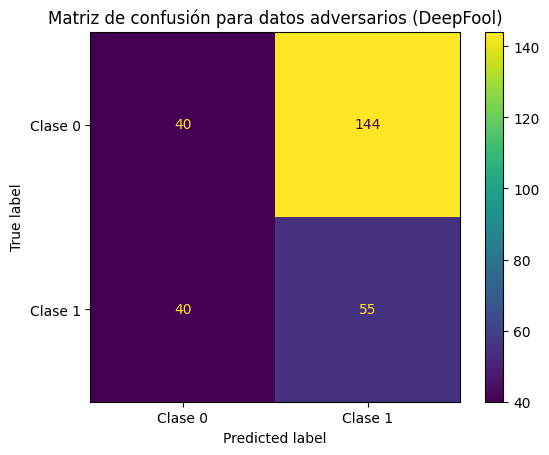

In [135]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Etiquetas verdaderas
try:
    y_true_adv4 = np.argmax(np_y_test, axis=1)  # Si es one-hot encoded
except:
    y_true_adv4 = np_y_test  # Si ya es un array unidimensional

# Predicciones adversarias
predictions_adv4 = classifier4.predict(x_test_adv4)
y_pred_adv4 = np.argmax(predictions_adv4, axis=1)  # Convertir a clases si es one-hot

# Calcular métricas
precision_adv4 = precision_score(y_true_adv4, y_pred_adv4, average="binary")
recall_adv4 = recall_score(y_true_adv4, y_pred_adv4, average="binary")
f1_adv4 = f1_score(y_true_adv4, y_pred_adv4, average="binary")
accuracy_adv4 = accuracy_score(y_true_adv4, y_pred_adv4)

# Mostrar resultados
print("Métricas en datos adversarios (DeepFool):")
print(f"Precisión: {precision_adv4:.2f}")
print(f"Recall: {recall_adv4:.2f}")
print(f"F1-score: {f1_adv4:.2f}")
print(f"Exactitud (Accuracy): {accuracy_adv4:.2f}")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_true_adv4, y_pred_adv4, target_names=["Clase 0", "Clase 1"]))

# Visualizar matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_true_adv4, y_pred_adv4, display_labels=["Clase 0", "Clase 1"])
plt.title("Matriz de confusión para datos adversarios (DeepFool)")
plt.show()


# Ataque 6 - CarliniL2Method

In [136]:
from art.attacks.evasion import CarliniL2Method

In [137]:
# Crear un clasificador ART a partir del modelo de TensorFlow
classifier6 = TensorFlowV2Classifier(
    model=model,
    input_shape=len(np_X_test[56:91]),
    clip_values=(0, 1),
    nb_classes=2,
    loss_object=tf.keras.losses.CategoricalCrossentropy()
)

# Evaluar el modelo en los datos de prueba limpios
predictions6 = np.argmax(classifier6.predict(np_X_test[56:91]), axis=1)


accuracy6 = np.sum(predictions6 == np.argmax(np_y_test[56:91])) / len(np_y_test[56:91])
print(f"Precisión en datos de prueba: {accuracy6 * 100:.2f}%")

attack6 = CarliniL2Method(classifier=classifier6)
x_test_adv6 = attack6.generate(x=np_X_test[56:91])
df_x_test_adv6 = pd.DataFrame(x_test_adv6)


Precisión en datos de prueba: 94.29%


C&W L_2:   0%|          | 0/35 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - acc: 0.7054 - loss: 3.7542


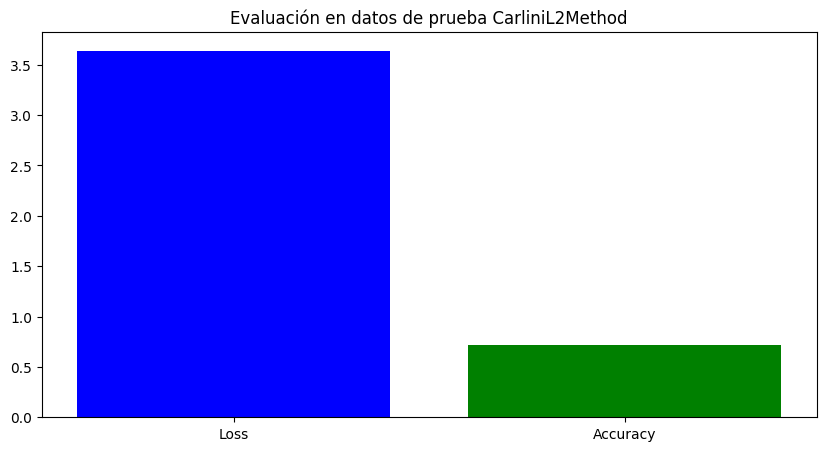

In [138]:
array_zeros = np.zeros(len(np_X_test[56:91]), dtype=int)

# Evaluar el modelo y graficar la pérdida y precisión
history_test6 = model.evaluate(x_test_adv6, array_zeros, verbose=True)

# Graficar la pérdida y precisión
plt.figure(figsize=(10, 5))
plt.bar(["Loss", "Accuracy"], history_test6, color=["blue", "green"])
plt.title("Evaluación en datos de prueba CarliniL2Method")
plt.show()

Métricas en datos adversarios (CarliniL2Method):
Precisión: 0.33
Recall: 1.00
F1-score: 0.50
Exactitud (Accuracy): 0.37

Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 0       1.00      0.08      0.15        24
     Clase 1       0.33      1.00      0.50        11

    accuracy                           0.37        35
   macro avg       0.67      0.54      0.33        35
weighted avg       0.79      0.37      0.26        35



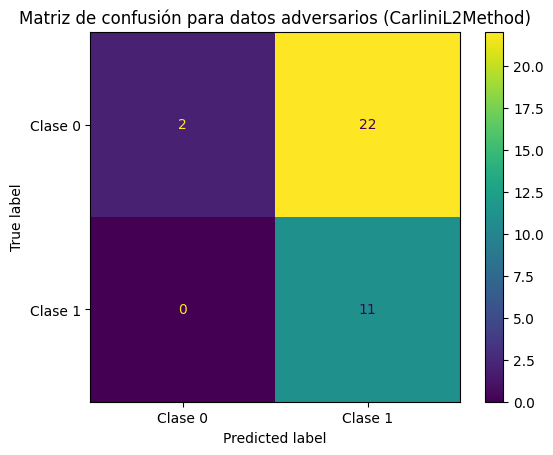

In [139]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Etiquetas verdaderas
try:
    y_true_adv6 = np.argmax(np_y_test[56:91], axis=1)  # Si es one-hot encoded
except:
    y_true_adv6 = np_y_test[56:91]  # Si ya es un array unidimensional

# Predicciones adversarias
predictions_adv6 = classifier6.predict(x_test_adv6)
y_pred_adv6 = np.argmax(predictions_adv6, axis=1)  # Convertir a clases si es one-hot

# Calcular métricas
precision_adv6 = precision_score(y_true_adv6, y_pred_adv6, average="binary")
recall_adv6 = recall_score(y_true_adv6, y_pred_adv6, average="binary")
f1_adv6 = f1_score(y_true_adv6, y_pred_adv6, average="binary")
accuracy_adv6 = accuracy_score(y_true_adv6, y_pred_adv6)

# Mostrar resultados
print("Métricas en datos adversarios (CarliniL2Method):")
print(f"Precisión: {precision_adv6:.2f}")
print(f"Recall: {recall_adv6:.2f}")
print(f"F1-score: {f1_adv6:.2f}")
print(f"Exactitud (Accuracy): {accuracy_adv6:.2f}")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_true_adv6, y_pred_adv6, target_names=["Clase 0", "Clase 1"]))

# Visualizar matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_true_adv6, y_pred_adv6, display_labels=["Clase 0", "Clase 1"])
plt.title("Matriz de confusión para datos adversarios (CarliniL2Method)")
plt.show()


# Ataque 7 - CarliniLInfMethod

In [140]:
from art.attacks.evasion import CarliniLInfMethod

In [141]:
# Crear un clasificador ART a partir del modelo de TensorFlow
classifier7 = TensorFlowV2Classifier(
    model=model,
    input_shape=len(np_X_test[90:125]),
    clip_values=(0, 1),
    nb_classes=2,
    loss_object=tf.keras.losses.CategoricalCrossentropy()
)

# Evaluar el modelo en los datos de prueba limpios
predictions7 = np.argmax(classifier7.predict(np_X_test[90:125]), axis=1)


accuracy7 = np.sum(predictions7 == np.argmax(np_y_test[90:125])) / len(np_y_test[90:125])
print(f"Precisión en datos de prueba: {accuracy7 * 100:.2f}%")

attack7 = CarliniLInfMethod(classifier=classifier7)
x_test_adv7 = attack7.generate(x=np_X_test[90:125])
df_x_test_adv7 = pd.DataFrame(x_test_adv7)


Precisión en datos de prueba: 94.29%


C&W L_inf:   0%|          | 0/35 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - acc: 0.6274 - loss: 4.7262


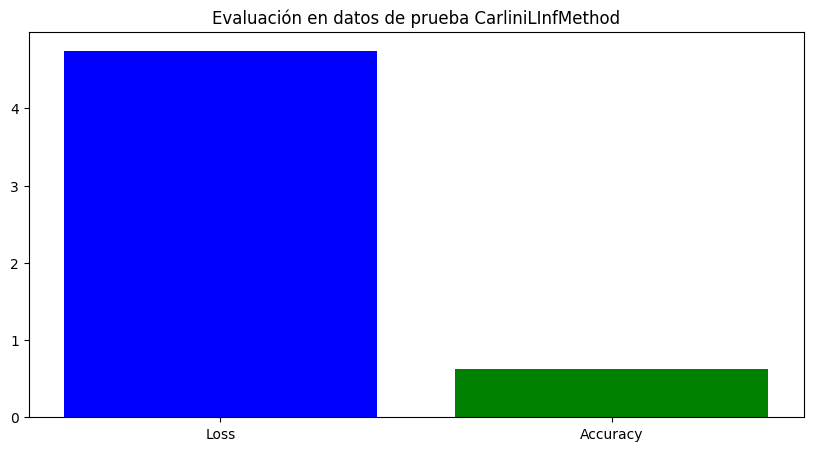

In [142]:


# Evaluar el modelo y graficar la pérdida y precisión
history_test7 = model.evaluate(x_test_adv7, array_zeros, verbose=True)

# Graficar la pérdida y precisión
plt.figure(figsize=(10, 5))
plt.bar(["Loss", "Accuracy"], history_test7, color=["blue", "green"])
plt.title("Evaluación en datos de prueba CarliniLInfMethod")
plt.show()

Métricas en datos adversarios (CarliniLInfMethod):
Precisión: 0.39
Recall: 1.00
F1-score: 0.57
Exactitud (Accuracy): 0.43

Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 0       1.00      0.09      0.17        22
     Clase 1       0.39      1.00      0.57        13

    accuracy                           0.43        35
   macro avg       0.70      0.55      0.37        35
weighted avg       0.77      0.43      0.31        35



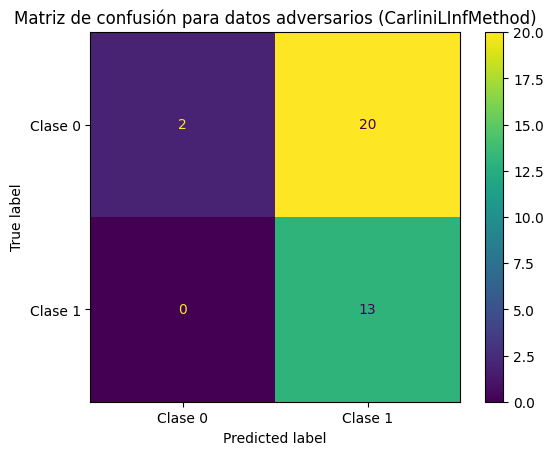

In [143]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Etiquetas verdaderas
try:
    y_true_adv7 = np.argmax(np_y_test[90:125], axis=1)  # Si es one-hot encoded
except:
    y_true_adv7 = np_y_test[90:125]  # Si ya es un array unidimensional

# Predicciones adversarias
predictions_adv7 = classifier7.predict(x_test_adv7)
y_pred_adv7 = np.argmax(predictions_adv7, axis=1)  # Convertir a clases si es one-hot

# Calcular métricas
precision_adv7 = precision_score(y_true_adv7, y_pred_adv7, average="binary")
recall_adv7 = recall_score(y_true_adv7, y_pred_adv7, average="binary")
f1_adv7 = f1_score(y_true_adv7, y_pred_adv7, average="binary")
accuracy_adv7 = accuracy_score(y_true_adv7, y_pred_adv7)

# Mostrar resultados
print("Métricas en datos adversarios (CarliniLInfMethod):")
print(f"Precisión: {precision_adv7:.2f}")
print(f"Recall: {recall_adv7:.2f}")
print(f"F1-score: {f1_adv7:.2f}")
print(f"Exactitud (Accuracy): {accuracy_adv7:.2f}")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_true_adv7, y_pred_adv7, target_names=["Clase 0", "Clase 1"]))

# Visualizar matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_true_adv7, y_pred_adv7, display_labels=["Clase 0", "Clase 1"])
plt.title("Matriz de confusión para datos adversarios (CarliniLInfMethod)")
plt.show()


# Ataque 8 - BoundaryAttack

In [144]:
from art.attacks.evasion import BoundaryAttack

In [145]:
array_zeros = np.zeros(len(np_X_test[10:45]), dtype=float)

In [146]:
# Crear un clasificador ART a partir del modelo de TensorFlow
classifier8 = TensorFlowV2Classifier(
    model=model,
    input_shape=len(np_X_test[10:45]),
    clip_values=(0, 1),
    nb_classes=2,
    loss_object=tf.keras.losses.CategoricalCrossentropy()
)

# Evaluar el modelo en los datos de prueba limpios
predictions8 = np.argmax(classifier8.predict(np_X_test[10:45]), axis=1)


accuracy8 = np.sum(predictions8 == np.argmax(np_y_test[10:45])) / len(np_y_test[10:45])
print(f"Precisión en datos de prueba: {accuracy8 * 100:.2f}%")

attack8 = BoundaryAttack(estimator=classifier8)
x_test_adv8 = attack8.generate(x=np_X_test[10:45], y=array_zeros)
df_x_test_adv8 = pd.DataFrame(x_test_adv8)


Precisión en datos de prueba: 80.00%


Boundary attack:   0%|          | 0/35 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/5000 [00:00<?, ?it/s]

TypeError: numpy.random.mtrand.RandomState.randn() argument after * must be an iterable, not int

In [147]:


# Evaluar el modelo y graficar la pérdida y precisión
history_test8 = model.evaluate(x_test_adv8, array_zeros, verbose=True)

# Graficar la pérdida y precisión
plt.figure(figsize=(10, 5))
plt.bar(["Loss", "Accuracy"], history_test8, color=["blue", "green"])
plt.title("Evaluación en datos de prueba BoundaryAttack")
plt.show()

NameError: name 'x_test_adv8' is not defined

In [148]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Etiquetas verdaderas
try:
    y_true_adv8 = np.argmax(np_y_test[10:45], axis=1)  # Si es one-hot encoded
except:
    y_true_adv8 = np_y_test[10:45]  # Si ya es un array unidimensional

# Predicciones adversarias
predictions_adv8 = classifier8.predict(x_test_adv8)
y_pred_adv8 = np.argmax(predictions_adv8, axis=1)  # Convertir a clases si es one-hot

# Calcular métricas
precision_adv8 = precision_score(y_true_adv8, y_pred_adv8, average="binary")
recall_adv8 = recall_score(y_true_adv8, y_pred_adv8, average="binary")
f1_adv8 = f1_score(y_true_adv8, y_pred_adv8, average="binary")
accuracy_adv8 = accuracy_score(y_true_adv8, y_pred_adv8)

# Mostrar resultados
print("Métricas en datos adversarios (BoundaryAttack):")
print(f"Precisión: {precision_adv8:.2f}")
print(f"Recall: {recall_adv8:.2f}")
print(f"F1-score: {f1_adv8:.2f}")
print(f"Exactitud (Accuracy): {accuracy_adv8:.2f}")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_true_adv8, y_pred_adv8, target_names=["Clase 0", "Clase 1"]))

# Visualizar matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_true_adv8, y_pred_adv8, display_labels=["Clase 0", "Clase 1"])
plt.title("Matriz de confusión para datos adversarios (BoundaryAttack)")
plt.show()


NameError: name 'x_test_adv8' is not defined

# Ataque 9 - HopSkipJump

In [149]:
# from art.attacks.evasion import AdversarialPatch # Error: TypeError: object of type 'int' has no len()
# from art.attacks.evasion import DecisionTreeAttack # EstimatorError: DecisionTreeAttack requires an estimator derived from <class 'art.estimators.classification.scikitlearn.ScikitlearnDecisionTreeClassifier'>
from art.attacks.evasion import HopSkipJump

In [150]:
print(np_X_test[43:78].shape)
print(array_zeros.shape)

(35, 12260)
(35,)


In [151]:
# Crear un clasificador ART a partir del modelo de TensorFlow
classifier9 = TensorFlowV2Classifier(
    model=model,
    input_shape=len(np_X_test[43:78]),
    clip_values=(0, 1),
    nb_classes=2,
    loss_object=tf.keras.losses.CategoricalCrossentropy()
)



# Evaluar el modelo en los datos de prueba limpios
predictions9 = np.argmax(classifier9.predict(np_X_test[43:78]), axis=1)


accuracy9 = np.sum(predictions8 == np.argmax(np_y_test[43:78])) / len(np_y_test[43:78])
print(f"Precisión en datos de prueba: {accuracy9 * 100:.2f}%")

attack9 = HopSkipJump(classifier=classifier9)
array_zeros = np.zeros(len(np_X_test[43:78]))

x_test_subset = np_X_test[43:78]

# Asegura que los datos tengan la forma correcta
if len(x_test_subset.shape) == 1:
    x_test_subset = x_test_subset.reshape(-1, 1)  # Convertir en 2D si es necesario

x_test_adv9 = attack9.generate(x=x_test_subset.astype(np.float32), y=array_zeros)

# x_test_adv9 = attack9.generate(x=np_X_test[43:78].astype(np.float32), y=array_zeros)
df_x_test_adv9 = pd.DataFrame(x_test_adv9)


Precisión en datos de prueba: 20.00%


HopSkipJump:   0%|          | 0/35 [00:00<?, ?it/s]

TypeError: 'int' object is not iterable

In [152]:


# Evaluar el modelo y graficar la pérdida y precisión
history_test9 = model.evaluate(x_test_adv9, array_zeros, verbose=True)

# Graficar la pérdida y precisión
plt.figure(figsize=(10, 5))
plt.bar(["Loss", "Accuracy"], history_test9, color=["blue", "green"])
plt.title("Evaluación en datos de prueba HopSkipJump")
plt.show()

NameError: name 'x_test_adv9' is not defined

In [153]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Etiquetas verdaderas
try:
    y_true_adv9 = np.argmax(np_y_test[43:78], axis=1)  # Si es one-hot encoded
except:
    y_true_adv9 = np_y_test[43:78]  # Si ya es un array unidimensional

# Predicciones adversarias
predictions_adv9 = classifier9.predict(x_test_adv9)
y_pred_adv9 = np.argmax(predictions_adv9, axis=1)  # Convertir a clases si es one-hot

# Calcular métricas
precision_adv9 = precision_score(y_true_adv9, y_pred_adv9, average="binary")
recall_adv9 = recall_score(y_true_adv9, y_pred_adv9, average="binary")
f1_adv9 = f1_score(y_true_adv9, y_pred_adv9, average="binary")
accuracy_adv9 = accuracy_score(y_true_adv9, y_pred_adv9)

# Mostrar resultados
print("Métricas en datos adversarios (HopSkipJump):")
print(f"Precisión: {precision_adv9:.2f}")
print(f"Recall: {recall_adv9:.2f}")
print(f"F1-score: {f1_adv9:.2f}")
print(f"Exactitud (Accuracy): {accuracy_adv9:.2f}")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_true_adv9, y_pred_adv9, target_names=["Clase 0", "Clase 1"]))

# Visualizar matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_true_adv9, y_pred_adv9, display_labels=["Clase 0", "Clase 1"])
plt.title("Matriz de confusión para datos adversarios (HopSkipJump)")
plt.show()


NameError: name 'x_test_adv9' is not defined

# Ataque 10 - SaliencyMapMethod

In [154]:
from art.attacks.evasion import SaliencyMapMethod

In [155]:
# Crear un clasificador ART a partir del modelo de TensorFlow
classifier10 = TensorFlowV2Classifier(
    model=model,
    input_shape=len(np_y_test[60:97]),
    clip_values=(0, 1),
    nb_classes=2,
    loss_object=tf.keras.losses.CategoricalCrossentropy()
)

# Evaluar el modelo en los datos de prueba limpios
predictions10 = np.argmax(classifier10.predict(np_X_test[60:97]), axis=1)

accuracy10 = np.sum(predictions10 == np.argmax(np_y_test[60:97])) / len(np_y_test[60:97])
print(f"Precisión en datos de prueba: {accuracy10 * 100:.2f}%")

Precisión en datos de prueba: 8.11%


In [156]:
array_zeros = np.zeros(len(np_X_test[60:97]), dtype=int)

attack10 = SaliencyMapMethod(classifier=classifier10, theta=0.1, gamma=0.9, batch_size=1)
x_test_adv10 = attack10.generate(x=np_X_test[60:97], y=array_zeros)
df_x_test_adv10 = pd.DataFrame(x_test_adv10)


JSMA:   0%|          | 0/37 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 1.0000 - loss: 3.0804e-08


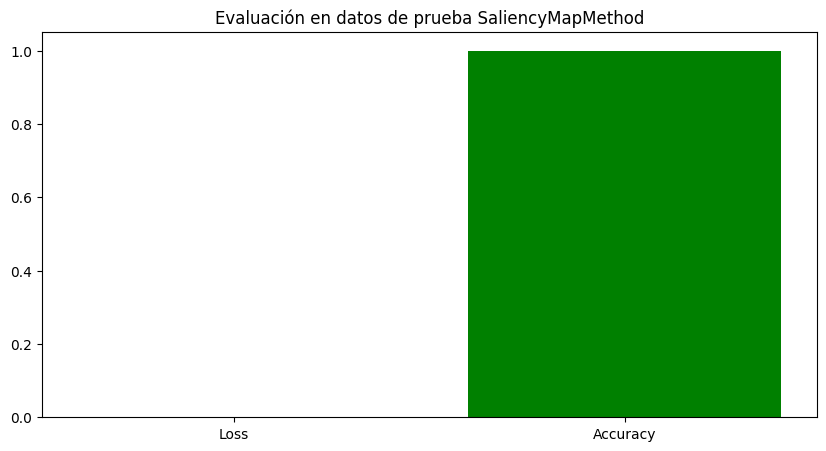

In [157]:


# Evaluar el modelo y graficar la pérdida y precisión
history_test10 = model.evaluate(x_test_adv10, array_zeros, verbose=True)

# Graficar la pérdida y precisión
plt.figure(figsize=(10, 5))
plt.bar(["Loss", "Accuracy"], history_test10, color=["blue", "green"])
plt.title("Evaluación en datos de prueba SaliencyMapMethod")
plt.show()

Métricas en datos adversarios (SaliencyMapMethod):
Precisión: 0.00
Recall: 0.00
F1-score: 0.00
Exactitud (Accuracy): 0.65

Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 0       0.65      1.00      0.79        24
     Clase 1       0.00      0.00      0.00        13

    accuracy                           0.65        37
   macro avg       0.32      0.50      0.39        37
weighted avg       0.42      0.65      0.51        37



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

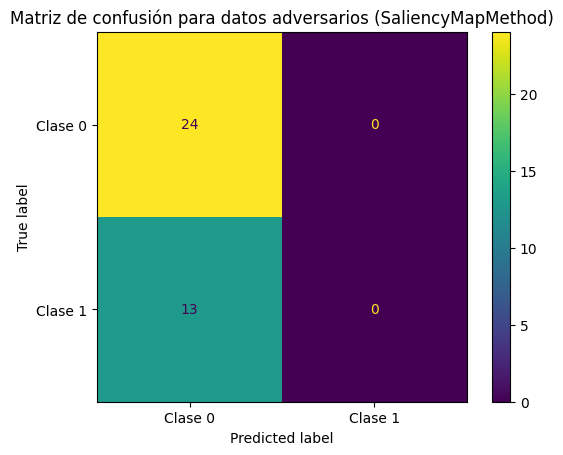

In [158]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Etiquetas verdaderas
try:
    y_true_adv10 = np.argmax(np_y_test[60:97], axis=1)  # Si es one-hot encoded
except:
    y_true_adv10 = np_y_test[60:97]  # Si ya es un array unidimensional

# Predicciones adversarias
predictions_adv10 = classifier10.predict(x_test_adv10)
y_pred_adv10 = np.argmax(predictions_adv10, axis=1)  # Convertir a clases si es one-hot

# Calcular métricas
precision_adv10 = precision_score(y_true_adv10, y_pred_adv10, average="binary")
recall_adv10 = recall_score(y_true_adv10, y_pred_adv10, average="binary")
f1_adv10 = f1_score(y_true_adv10, y_pred_adv10, average="binary")
accuracy_adv10 = accuracy_score(y_true_adv10, y_pred_adv10)

# Mostrar resultados
print("Métricas en datos adversarios (SaliencyMapMethod):")
print(f"Precisión: {precision_adv10:.2f}")
print(f"Recall: {recall_adv10:.2f}")
print(f"F1-score: {f1_adv10:.2f}")
print(f"Exactitud (Accuracy): {accuracy_adv10:.2f}")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_true_adv10, y_pred_adv10, target_names=["Clase 0", "Clase 1"]))

# Visualizar matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_true_adv10, y_pred_adv10, display_labels=["Clase 0", "Clase 1"])
plt.title("Matriz de confusión para datos adversarios (SaliencyMapMethod)")
plt.show()


# Curvas ROC



## FGSM


Forma de y_test_categorical: (35, 2)
Forma de y_pred_prob: (35, 2)


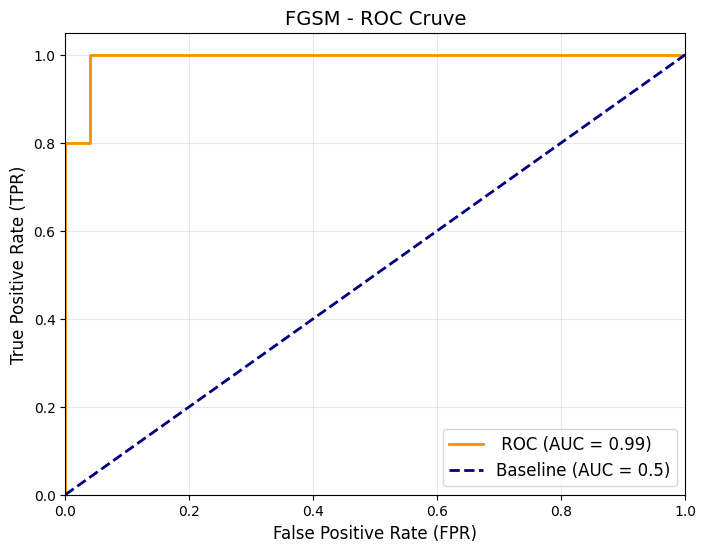

In [159]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

# Obtener las probabilidades predichas por el modelo para los datos adversarios
y_pred_prob = classifier.predict(x_test_adv)  # Predicciones en formato de probabilidad

# Convertir etiquetas de prueba a formato categórico si no lo están
if len(np_y_test.shape) == 1:
    y_test_categorical = to_categorical(np_y_test[0:35], num_classes=2)
else:
    y_test_categorical = np_y_test[0:35]

# Confirmar dimensionalidad
print("Forma de y_test_categorical:", y_test_categorical.shape)
print("Forma de y_pred_prob:", y_pred_prob.shape)

# Calcular FPR y TPR para la clase positiva
if len(y_pred_prob.shape) == 1 or y_pred_prob.shape[1] == 1:
    fpr, tpr, _ = roc_curve(y_test_categorical.ravel(), y_pred_prob.ravel())
else:
    fpr, tpr, _ = roc_curve(y_test_categorical[:, 1], y_pred_prob[:, 1])  # Para clase positiva

# Calcular AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f' ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('FGSM - ROC Cruve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## BasicIterativeMethod

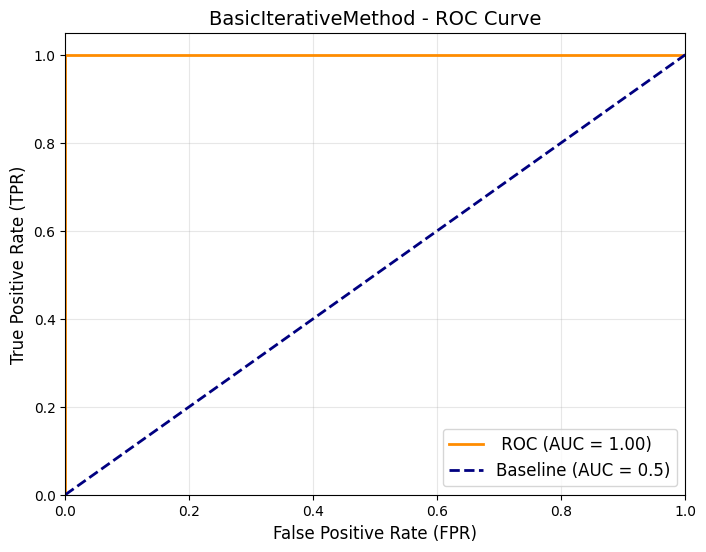

In [160]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Evaluar el modelo en los datos adversarios
predictions_adv2 = np.argmax(classifier2.predict(x_test_adv2), axis=1)

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob2 = classifier2.predict(x_test_adv2)[:, 1]  # Asumiendo que la segunda columna es la probabilidad de la clase positiva

# Calcular FPR y TPR para la curva ROC
fpr2, tpr2, thresholds2 = roc_curve(np_y_test[35:70], y_pred_prob2)

# Calcular el AUC
roc_auc2 = auc(fpr2, tpr2)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f' ROC (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('BasicIterativeMethod - ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## Project Gradient Descent

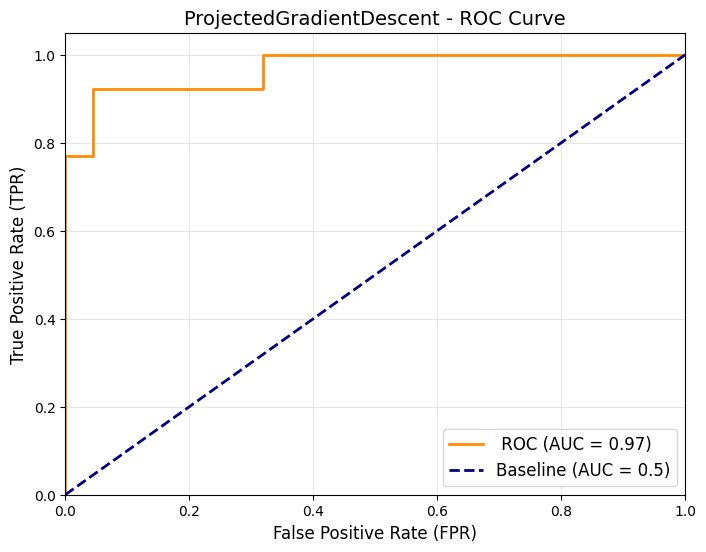

In [161]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Evaluar el modelo en los datos adversarios
predictions_adv3 = np.argmax(classifier3.predict(x_test_adv3), axis=1)

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob3 = classifier3.predict(x_test_adv3)[:, 1]  # Asumiendo que la segunda columna es la probabilidad de la clase positiva

# Calcular FPR y TPR para la curva ROC
fpr3, tpr3, thresholds3 = roc_curve(np_y_test[70:105], y_pred_prob3)

# Calcular el AUC
roc_auc3 = auc(fpr3, tpr3)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label=f' ROC (AUC = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ProjectedGradientDescent - ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## ZOO

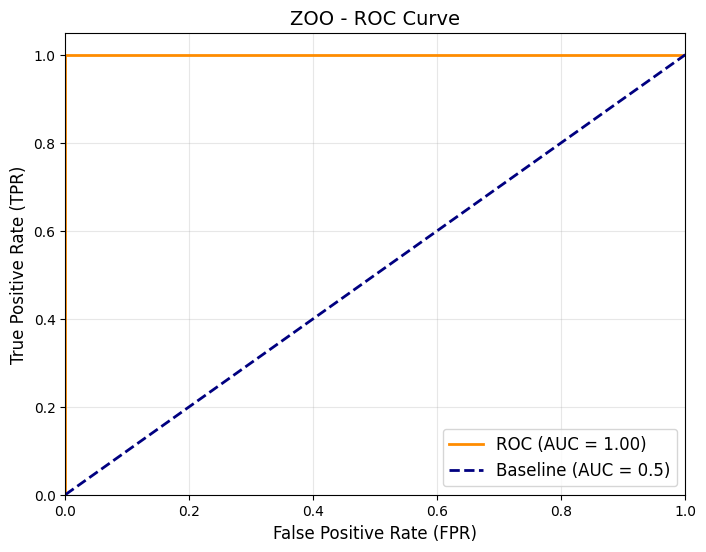

In [162]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones sobre los datos adversarios generados
y_pred_prob5 = classifier5.predict(x_test_adv5)  # Predicciones del modelo en los datos adversarios

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob5 = y_pred_prob5[:, 1]  # Asumiendo que la segunda columna contiene las probabilidades para la clase positiva

# Calcular FPR y TPR para la curva ROC
fpr5, tpr5, thresholds5 = roc_curve(np_y_test[99:134], y_pred_prob5)

# Calcular el AUC
roc_auc5 = auc(fpr5, tpr5)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr5, tpr5, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc5:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ZOO - ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## Deepfool

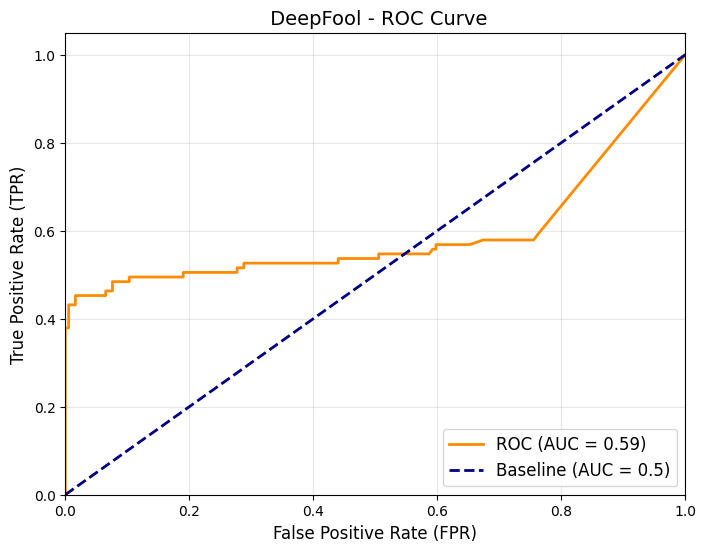

In [163]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones sobre los datos adversarios generados
y_pred_prob4 = classifier4.predict(x_test_adv4)  # Predicciones del modelo en los datos adversarios

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob4 = y_pred_prob4[:, 1]  # Asumiendo que la segunda columna contiene las probabilidades para la clase positiva

# Calcular FPR y TPR para la curva ROC
fpr4, tpr4, thresholds4 = roc_curve(np_y_test, y_pred_prob4)

# Calcular el AUC
roc_auc4 = auc(fpr4, tpr4)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr4, tpr4, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title(' DeepFool - ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## CarliniL2Method

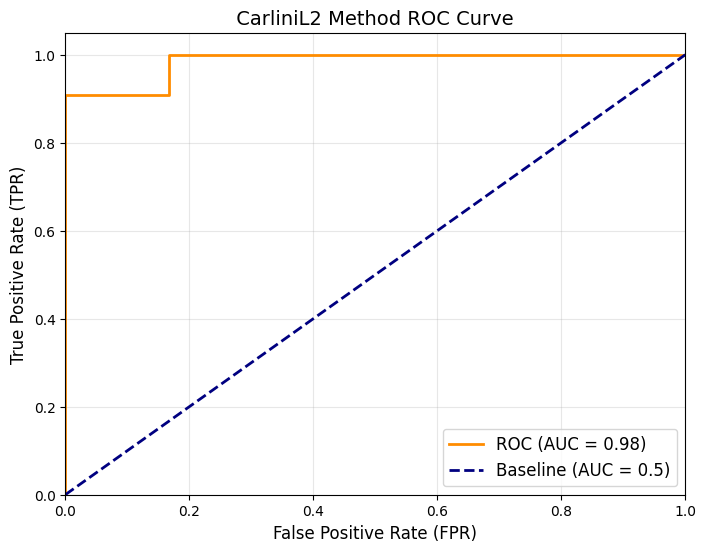

In [164]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones sobre los datos adversarios generados
y_pred_prob6 = classifier6.predict(x_test_adv6)  # Predicciones del modelo en los datos adversarios

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob6 = y_pred_prob6[:, 1]  # Asumiendo que la segunda columna contiene las probabilidades para la clase positiva

# Calcular FPR y TPR para la curva ROC
fpr6, tpr6, thresholds6 = roc_curve(np_y_test[56:91], y_pred_prob6)

# Calcular el AUC
roc_auc6 = auc(fpr6, tpr6)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr6, tpr6, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc6:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title(' CarliniL2 Method ROC Curve ', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## Carlini LInf Method

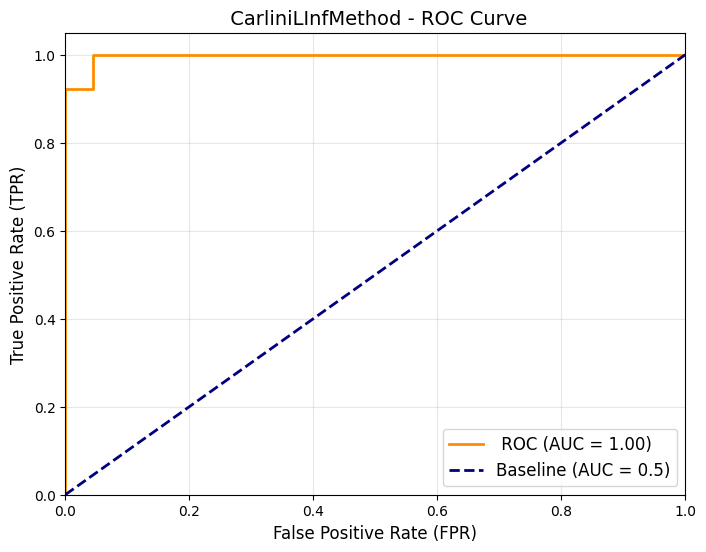

In [165]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones sobre los datos adversarios generados
y_pred_prob7 = classifier7.predict(x_test_adv7)  # Predicciones del modelo en los datos adversarios

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob7 = y_pred_prob7[:, 1]  # Asumiendo que la segunda columna contiene las probabilidades para la clase positiva

# Calcular FPR y TPR para la curva ROC
fpr7, tpr7, thresholds7 = roc_curve(np_y_test[90:125], y_pred_prob7)

# Calcular el AUC
roc_auc7 = auc(fpr7, tpr7)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr7, tpr7, color='darkorange', lw=2, label=f' ROC (AUC = {roc_auc7:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title(' CarliniLInfMethod - ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## BoundaryAttack

In [166]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones sobre los datos adversarios generados
y_pred_prob8 = classifier8.predict(x_test_adv8)  # Predicciones del modelo en los datos adversarios

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob8 = y_pred_prob8[:, 1]  # Asumiendo que la segunda columna contiene las probabilidades para la clase positiva

# Calcular FPR y TPR para la curva ROC
fpr8, tpr8, thresholds8 = roc_curve(np_y_test[10:45], y_pred_prob8)

# Calcular el AUC
roc_auc8 = auc(fpr8, tpr8)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr8, tpr8, color='darkorange', lw=2, label=f' ROC (AUC = {roc_auc8:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('CarliniLInfMethod - ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


NameError: name 'x_test_adv8' is not defined

## HopSkipJump

In [167]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones sobre los datos adversarios generados
y_pred_prob9 = classifier9.predict(x_test_adv9)  # Predicciones del modelo en los datos adversarios

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob9 = y_pred_prob9[:, 1]  # Asumiendo que la segunda columna contiene las probabilidades para la clase positiva

# Calcular FPR y TPR para la curva ROC
fpr9, tpr9, thresholds9 = roc_curve(np_y_test[43:78], y_pred_prob9)

# Calcular el AUC
roc_auc9 = auc(fpr9, tpr9)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr8, tpr8, color='darkorange', lw=2, label=f' ROC (AUC = {roc_auc9:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title(' HopSkipJump - ROC curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


NameError: name 'x_test_adv9' is not defined

## Saliency Map Method

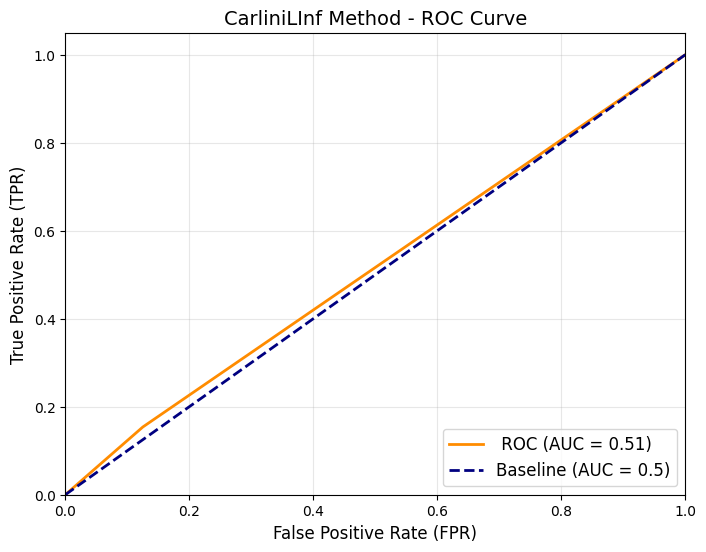

In [168]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones sobre los datos adversarios generados
y_pred_prob10 = classifier10.predict(x_test_adv10)  # Predicciones del modelo en los datos adversarios

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob10 = y_pred_prob10[:, 1]  # Asumiendo que la segunda columna contiene las probabilidades para la clase positiva

# Calcular FPR y TPR para la curva ROC
fpr10, tpr10, thresholds10 = roc_curve(np_y_test[60:97], y_pred_prob10)

# Calcular el AUC
roc_auc10 = auc(fpr10, tpr10)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr10, tpr10, color='darkorange', lw=2, label=f' ROC (AUC = {roc_auc10:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('CarliniLInf Method - ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


# Guardar en un archivo

In [169]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [170]:
dataset.head()

,Static_analysis.Opcodes.const-class,Static_analysis.Opcodes.move-object,Static_analysis.Opcodes.sparse-switch-payload,Static_analysis.Opcodes.return-void,Static_analysis.Opcodes.if-eqz,Static_analysis.Opcodes.invoke-static,Static_analysis.Opcodes.goto/16,Static_analysis.Opcodes.const/4,Static_analysis.Opcodes.sparse-switch,Static_analysis.Opcodes.move-exception,...,Static_analysis.Receivers.com.software.android.install.SmsReceiver,Static_analysis.Receivers.com.google.android.c2dm.C2DMBroadcastReceiver,Dynamic_analysis.Droidbox.recvsaction.com.google.android.c2dm.C2DMBroadcastReceiver,Dynamic_analysis.Droidbox.recvsaction..Notificator,Dynamic_analysis.Droidbox.recvsaction..SmsReceiver,Dynamic_analysis.Droidbox.recvsaction..Checker,com.software.android.install.permission.C2D_MESSAGE,com.google.android.c2dm.permission.RECEIVE,Dynamic_analysis.Droidbox.fdaccess,Dynamic_analysis.Droidbox.dexclass
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [171]:
dataset.columns[-1]

titulos_cols = dataset.columns.values.tolist()
#titulos_cols = dataset.columns.values.tolist()

print(len(titulos_cols))

12261


In [172]:
type(titulos_cols)
titulos_cols.pop()

'Dynamic_analysis.Droidbox.dexclass'

In [177]:


df_x_test_adv = pd.DataFrame(x_test_adv)
all_attacks = pd.concat([df_x_test_adv, df_x_test_adv2], ignore_index=True)

all_attacks = pd.concat([all_attacks, df_x_test_adv3], ignore_index=True)
all_attacks = pd.concat([all_attacks, df_x_test_adv4], ignore_index=True)
all_attacks = pd.concat([all_attacks, df_x_test_adv5], ignore_index=True)

# all_attacks = pd.concat([all_attacks, df_x_test_adv6], ignore_index=True)
all_attacks = pd.concat([all_attacks, df_x_test_adv7], ignore_index=True)
# all_attacks = pd.concat([all_attacks, df_x_test_adv8], ignore_index=True)
# all_attacks = pd.concat([all_attacks, df_x_test_adv9], ignore_index=True)
all_attacks = pd.concat([all_attacks, df_x_test_adv10], ignore_index=True)

In [178]:
all_attacks.columns = titulos_cols

In [179]:
print(len(all_attacks))

491


In [180]:

# Guardar el DataFrame en un archivo CSV
all_attacks.to_csv("adversarial_data_7Marzv3.csv", index=False, header=True)

In [181]:
all_attacks.head()

,Static_analysis.Opcodes.const-class,Static_analysis.Opcodes.move-object,Static_analysis.Opcodes.sparse-switch-payload,Static_analysis.Opcodes.return-void,Static_analysis.Opcodes.if-eqz,Static_analysis.Opcodes.invoke-static,Static_analysis.Opcodes.goto/16,Static_analysis.Opcodes.const/4,Static_analysis.Opcodes.sparse-switch,Static_analysis.Opcodes.move-exception,...,Static_analysis.Receivers.com.software.android.install.Checker,Static_analysis.Receivers.com.software.android.install.SmsReceiver,Static_analysis.Receivers.com.google.android.c2dm.C2DMBroadcastReceiver,Dynamic_analysis.Droidbox.recvsaction.com.google.android.c2dm.C2DMBroadcastReceiver,Dynamic_analysis.Droidbox.recvsaction..Notificator,Dynamic_analysis.Droidbox.recvsaction..SmsReceiver,Dynamic_analysis.Droidbox.recvsaction..Checker,com.software.android.install.permission.C2D_MESSAGE,com.google.android.c2dm.permission.RECEIVE,Dynamic_analysis.Droidbox.fdaccess
0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:
all_attacks.columns

Index(['Static_analysis.Opcodes.const-class',
       'Static_analysis.Opcodes.move-object',
       'Static_analysis.Opcodes.sparse-switch-payload',
       'Static_analysis.Opcodes.return-void', 'Static_analysis.Opcodes.if-eqz',
       'Static_analysis.Opcodes.invoke-static',
       'Static_analysis.Opcodes.goto/16', 'Static_analysis.Opcodes.const/4',
       'Static_analysis.Opcodes.sparse-switch',
       'Static_analysis.Opcodes.move-exception',
       ...
       'Static_analysis.Receivers.com.software.android.install.Checker',
       'Static_analysis.Receivers.com.software.android.install.SmsReceiver',
       'Static_analysis.Receivers.com.google.android.c2dm.C2DMBroadcastReceiver',
       'Dynamic_analysis.Droidbox.recvsaction.com.google.android.c2dm.C2DMBroadcastReceiver',
       'Dynamic_analysis.Droidbox.recvsaction..Notificator',
       'Dynamic_analysis.Droidbox.recvsaction..SmsReceiver',
       'Dynamic_analysis.Droidbox.recvsaction..Checker',
       'com.software.android.insta